In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
X_train[0].shape

(28, 28)

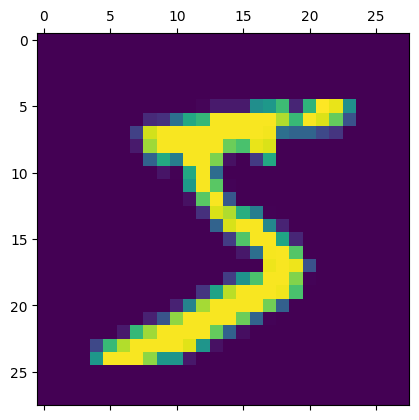

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8138 - loss: 0.7214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9146 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9220 - loss: 0.2768
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9238 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9251 - loss: 0.2727


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.3023


[0.26394209265708923, 0.925599992275238]

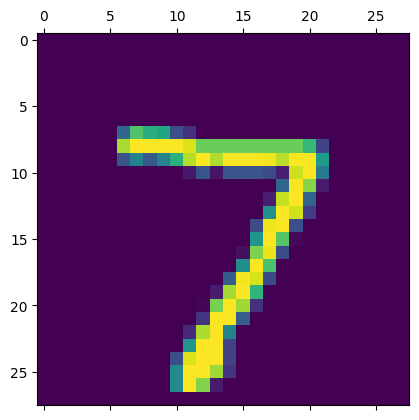

In [ ]:
plt.matshow(X_test[0])

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.15602797e-02, 4.01342760e-07, 1.04349315e-01, 9.69467103e-01,
       2.78918003e-03, 1.00920618e-01, 1.28055535e-06, 9.99863565e-01,
       1.35248587e-01, 6.92457378e-01], dtype=float32)

In [ ]:
np.argmax(Y_predicted[0])

7

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    5,   10,    4,    2,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    9,  935,   15,    7,    3,   11,   10,   33,    5],
       [   2,    0,   23,  921,    0,   23,    2,   13,   19,    7],
       [   1,    2,    4,    0,  915,    0,   11,    4,    7,   38],
       [   8,    3,    5,   39,   10,  764,   14,   10,   32,    7],
       [   7,    3,    8,    1,    7,   14,  913,    2,    3,    0],
       [   1,    5,   23,    5,    6,    0,    0,  953,    2,   33],
       [   4,   11,    6,   24,    9,   24,   10,   12,  865,    9],
       [   9,    7,    2,   11,   24,    5,    0,   27,    6,  918]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

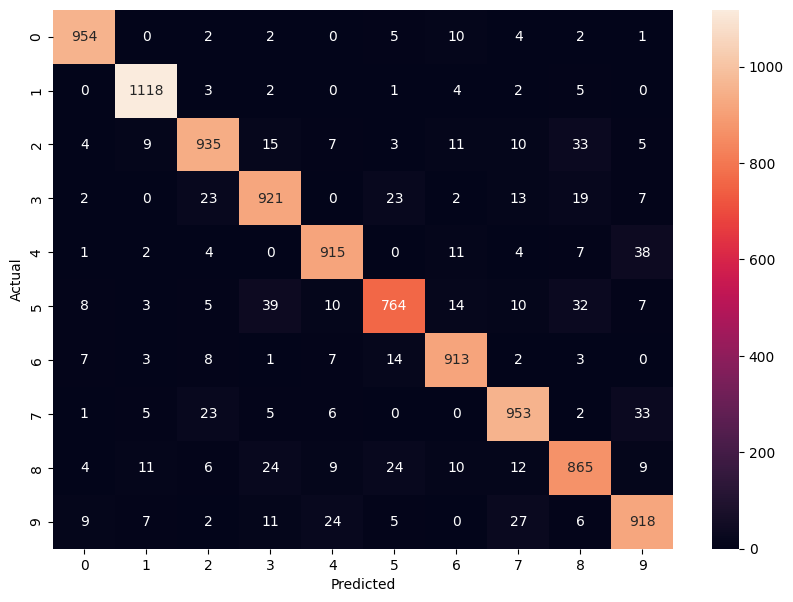

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(

    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8686 - loss: 0.4645
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9613 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9817 - loss: 0.0614
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0478


In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1066


[0.08833315223455429, 0.9721999764442444]